In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('customer_shopping_behavior.csv')

In [61]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [63]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [64]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [65]:
df['Review Rating'] = (
    df.groupby('Category')['Review Rating']
      .transform(lambda x: x.fillna(x.median()))
)

In [66]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [67]:
df.columns = (
    df.columns
      .str.lower()
      .str.replace(' ', '_')
)
df = df.rename(columns={'purchase_amount_(usd)': 'purchase_amount'})

In [68]:
# create a new column age_group
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels = labels)

In [69]:
# Average amount spent per purchase.
avg_spend = df.groupby('customer_id')['purchase_amount'].mean()


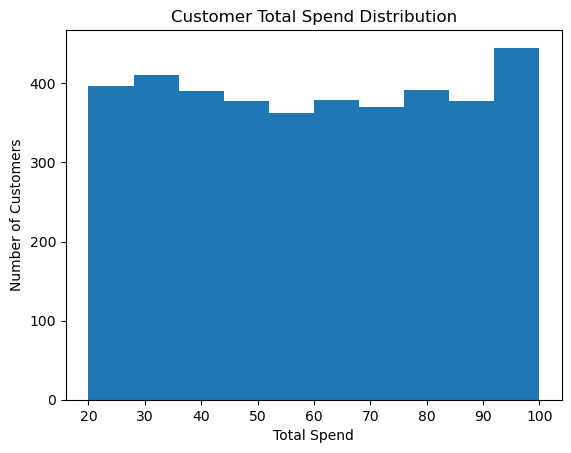

In [70]:
# identify low vs high-value customers.
total_spend = df.groupby('customer_id')['purchase_amount'].sum()

plt.figure()
total_spend.plot(kind='hist')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.title('Customer Total Spend Distribution')
plt.show()


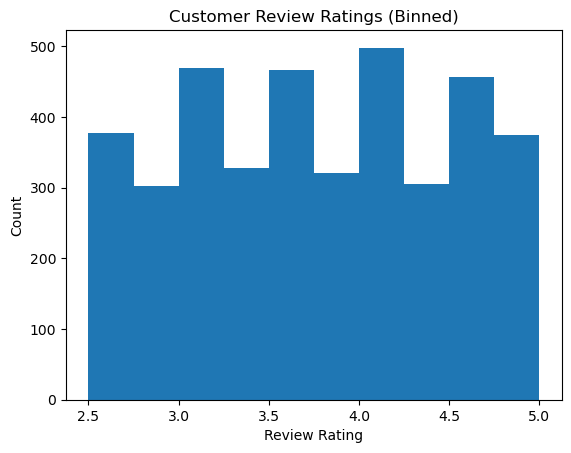

In [71]:
# Review Ratings
plt.figure()
plt.hist(df['review_rating'], bins=10)
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Customer Review Ratings (Binned)')
plt.show()


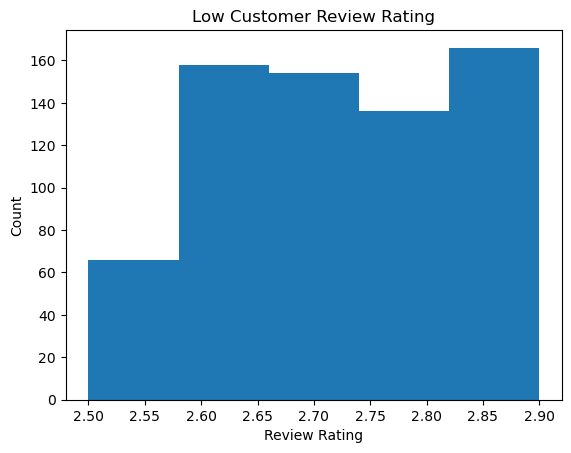

In [72]:
# Customer Low Rating Review
low_ratings = df[df['review_rating'] < 3]

plt.figure()
plt.hist(low_ratings['review_rating'], bins=5)
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Low Customer Review Rating')
plt.show()


<Figure size 640x480 with 0 Axes>

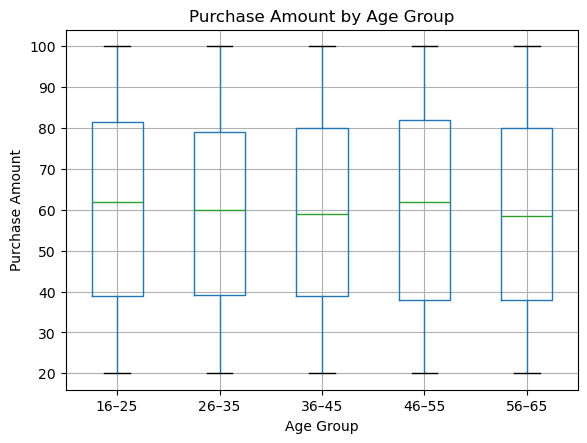

In [73]:
# Age Group vs Purchase Amount

# Create age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[15, 25, 35, 45, 55, 65],
    labels=['16–25', '26–35', '36–45', '46–55', '56–65']
)

plt.figure()
df.boxplot(column='purchase_amount', by='age_group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount by Age Group')
plt.suptitle('')  # remove automatic subtitle
plt.show()


In [74]:
# Identify churn-risk customers

In [75]:
# Define churn-risk conditions
df['churn_risk'] = (
    (df['frequency_of_purchases'].isin(['Annually', 'Quarterly'])) |
    (df['review_rating'] < 3) |
    (df['previous_purchases'] < 5)
)

# Convert to label
df['churn_risk'] = df['churn_risk'].map({True: 'High Risk', False: 'Low Risk'})


In [76]:
churn_customers = df[df['churn_risk'] == 'High Risk']
churn_customers.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_group,churn_risk
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,16–25,High Risk
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,36–45,High Risk
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,46–55,High Risk
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,56–65,High Risk
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually,26–35,High Risk


<Figure size 640x480 with 0 Axes>

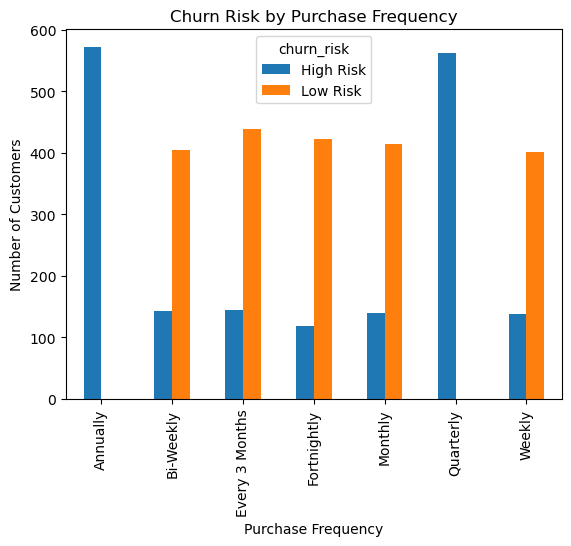

In [78]:
# hurn Risk by Purchase Frequency
freq_col = 'frequency_of_purchases'  # replace with the correct name
plt.figure()
pd.crosstab(df[freq_col], df['churn_risk']).plot(kind='bar')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.title('Churn Risk by Purchase Frequency')
plt.show()
